Imports

In [21]:
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import numpy as np


Loading and Pre-processing the data

In [22]:
concrete_compressive_strength = fetch_ucirepo(id = 165)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets
df = pd.concat([X,y],axis=1)
# Adding a column of ones as intercept
X = np.hstack((np.ones((X.shape[0], 1)), X.values))
y = y.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.dtype)


float64


Defining the model

In [24]:
model = BayesianRidge()
model.fit(X_train,y_train)

c:\Users\Aaditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

Make Predictions

In [26]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Evaluating Model

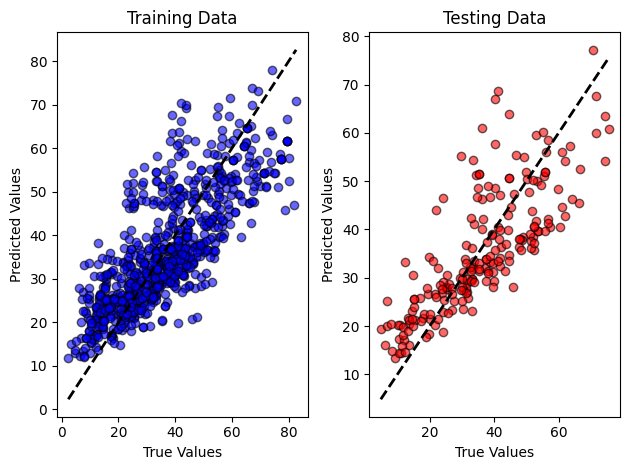

Model coefficients: [ 0.         11.86299759  8.7991468   4.75451926 -3.25882778  1.86220068
  1.00599131  1.43586885  7.29543275]
Model intercept: 35.81829943923469


In [27]:
# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training Data')

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Testing Data')

plt.tight_layout()
plt.show()

# Model coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)